In [4]:
import re
from functools import partial

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('archive/laptops.csv', encoding='latin-1')

#drop the useless columns

df = df.drop(columns='Unnamed: 0')
# fix a small inssue in data


In [8]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [9]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [10]:
df = pd.read_csv('archive/laptops.csv', encoding='latin-1')
#drop the useless columns

df = df.drop(columns='Unnamed: 0')
# fix a small inssue in data


FileNotFoundError: ignored

In [11]:
def extract_product(product):
    product_list = product.split()
    product = product_list[0]
    if product_list[1].isalpha() or product_list[1][0].isalpha() :
        product += ' ' + product_list[1]
    return product

def extract_pure_resolution(screen_resolution):
    return re.search('[0-9]{3,4}x[0-9]{3,4}', screen_resolution).group()


In [12]:
df['Convertible'] = df['TypeName'] == '2 in 1 Convertible'
df['Product'] = df['Product'].apply(extract_product)
df['Retina Display'] = df['ScreenResolution'].str.contains('Retina Display')
df['Touchscreen'] = df['ScreenResolution'].str.contains("Touchscreen")
df['IPS Panel'] = df['ScreenResolution'].str.contains('IPS Panel')
df['Quad HD+'] = df['ScreenResolution'].str.contains('Quad HD+')
df['Ultra HD'] = df['ScreenResolution'].str.contains('Ultra HD')
df['ScreenResolution'] = df['ScreenResolution'].apply(extract_pure_resolution)

In [13]:
df['CPU brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu speed'] = df['Cpu'].apply(lambda x: float(re.search('([0-9]{1,2}\.[0-9]{1,3}GHz)|([0-9]GHz)', x)[0].replace('GHz', '')))
df['Cpu type'] = df['Cpu'].apply(lambda x: x.split()[1])
df['free OpSys'] = df['OpSys'].apply(lambda x: x in ('Linux', 'Android', 'No OS'))

In [14]:
df['Ram'] = df['Ram'].apply(lambda x: int(x.replace('GB', '')))
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace('kg', '')))

In [15]:
df[df['Cpu type']=='Pentium']['Cpu']

49      Intel Pentium Quad Core N4200 1.1GHz
166     Intel Pentium Quad Core N4200 1.1GHz
305     Intel Pentium Quad Core N4200 1.1GHz
319     Intel Pentium Quad Core N3710 1.6GHz
365     Intel Pentium Quad Core N3710 1.6GHz
443     Intel Pentium Quad Core N4200 1.1GHz
455     Intel Pentium Quad Core N3710 1.6GHz
465     Intel Pentium Quad Core N4200 1.1GHz
537     Intel Pentium Quad Core N3710 1.6GHz
568     Intel Pentium Quad Core N4200 1.1GHz
571     Intel Pentium Quad Core N3710 1.6GHz
609     Intel Pentium Quad Core N3710 1.6GHz
766     Intel Pentium Quad Core N4200 1.1GHz
769     Intel Pentium Quad Core N4200 1.1GHz
779     Intel Pentium Dual Core N4200 1.1GHz
804     Intel Pentium Quad Core N4200 1.1GHz
825     Intel Pentium Dual Core 4405U 2.1GHz
856     Intel Pentium Quad Core N4200 1.1GHz
876     Intel Pentium Quad Core N4200 1.1GHz
884     Intel Pentium Quad Core N3710 1.6GHz
930     Intel Pentium Quad Core N4200 1.1GHz
941     Intel Pentium Quad Core N3710 1.6GHz
957     In

In [16]:
df['Memory'] = df['Memory'].apply(lambda x: x.replace('.0', ''))

def process_memory(memory, _type):
    gb_match = re.match('([0-9]{1,4})GB ' + _type, memory)
    if gb_match:
        return int(gb_match.groups()[0])
    
    tb_match = re.match('([0-9]{1,4})TB ' + _type, memory)

    if tb_match:
        return int(tb_match.groups()[0]) * 1000

    return 0


def process_combined_memory(_type, memory):
    split_memory = memory.split(' +  ')
    res = sum(process_memory(mem, _type) for mem in split_memory)
    return res

for memory_type in types:
    df[memory_type] = df['Memory'].apply(partial(process_combined_memory, memory_type))


NameError: ignored

In [29]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Touchscreen,IPS Panel,Quad HD+,Ultra HD,CPU brand,Cpu speed,Cpu type,free OpSys,GPU_provider,Pixels Per Inch
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,False,True,False,False,Intel,2.3,Core,False,Intel,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,False,False,False,False,Intel,1.8,Core,False,Intel,127.677940
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,False,False,False,False,Intel,2.5,Core,True,Intel,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,False,True,False,False,Intel,2.7,Core,False,AMD,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,False,True,False,False,Intel,3.1,Core,False,Intel,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,True,True,False,False,Intel,2.5,Core,False,Intel,157.350512
1299,Lenovo,Yoga,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,True,True,True,False,Intel,2.5,Core,False,Intel,276.053530
1300,Lenovo,IdeaPad,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,False,False,False,False,Intel,1.6,Celeron,False,Intel,111.935204
1301,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,False,False,False,False,Intel,2.5,Core,False,AMD,100.454670


In [20]:
df['GPU_provider'] = df['Gpu'].apply(lambda x: x.split()[0])

In [21]:
import math

def resolution_to_number(resolution, diagonal):
    width, height = map(int, resolution.split('x'))
    return math.sqrt(width**2+height**2)/diagonal

In [22]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Convertible',
       'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD',
       'CPU brand', 'Cpu speed', 'Cpu type', 'free OpSys', 'GPU_provider'],
      dtype='object')

In [23]:
df['Pixels Per Inch'] = df.apply(lambda x: resolution_to_number(x.ScreenResolution, x.Inches), axis=1)

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})

sns.barplot(x=df["TypeName"], y=df["Price_euros"])

In [ ]:
sns.barplot(x=df["Company"], y=df["Price_euros"])

In [ ]:
sns.barplot(x=df["CPU brand"], y=df["Price_euros"])

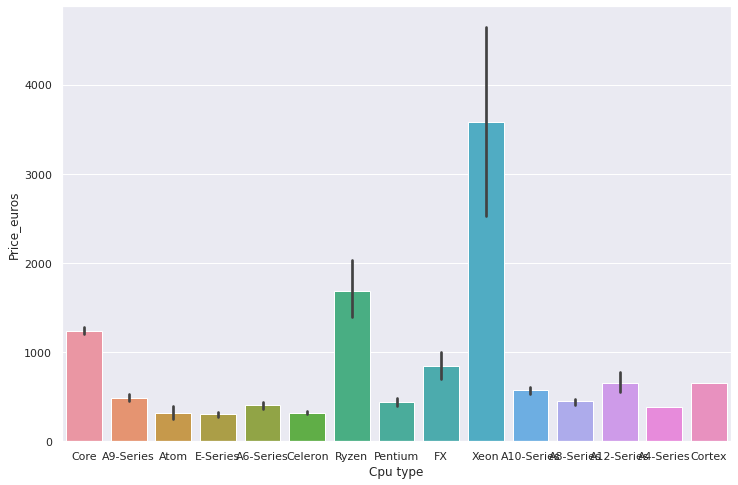

In [32]:
sns.barplot(x=df["Cpu type"], y=df["Price_euros"])

In [ ]:
sns.barplot(x=df["GPU_provider"], y=df["Price_euros"])

In [ ]:
sns.barplot(x=df["free OpSys"], y=df["Price_euros"])

In [ ]:
sns.barplot(x=df["Ram"], y=df["Price_euros"], order=sorted(df["Ram"].unique()))

In [ ]:
sns.barplot(x=df["Cpu speed"], y=df["Price_euros"], order=sorted(df["Cpu speed"].unique()))

# 'Cpu speed' may be ignored (?)

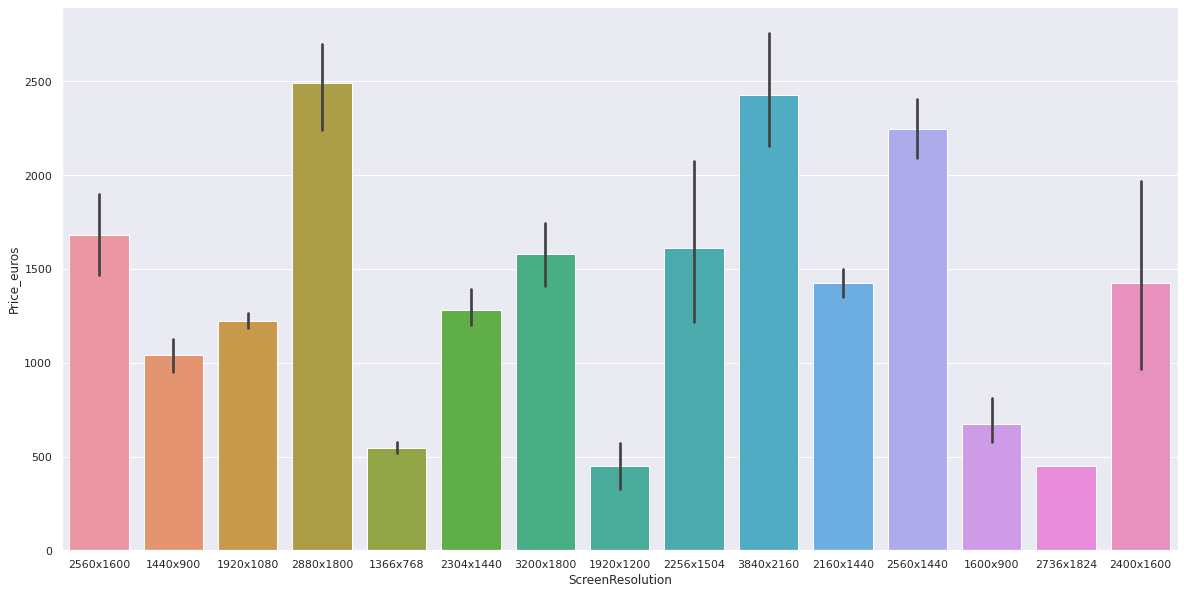

In [25]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.barplot(x=df["ScreenResolution"], y=df["Price_euros"])

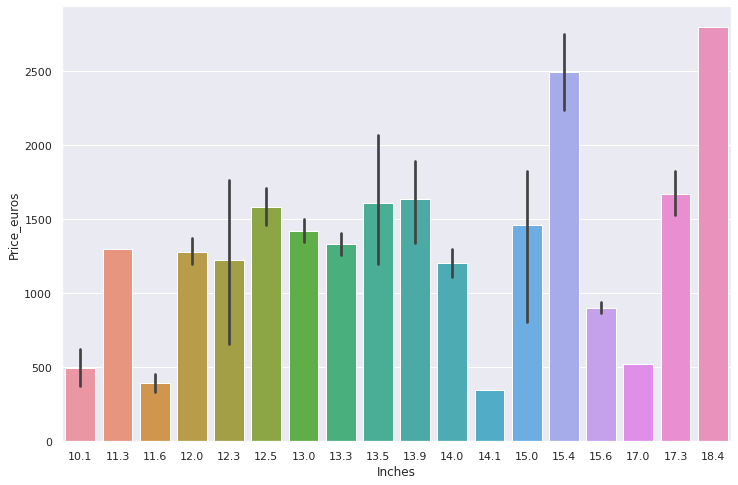

In [26]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.barplot(x=df["Inches"], y=df["Price_euros"])
# Price does not increase when 'Inches' increase. Hence 'Inches' may be ignored.

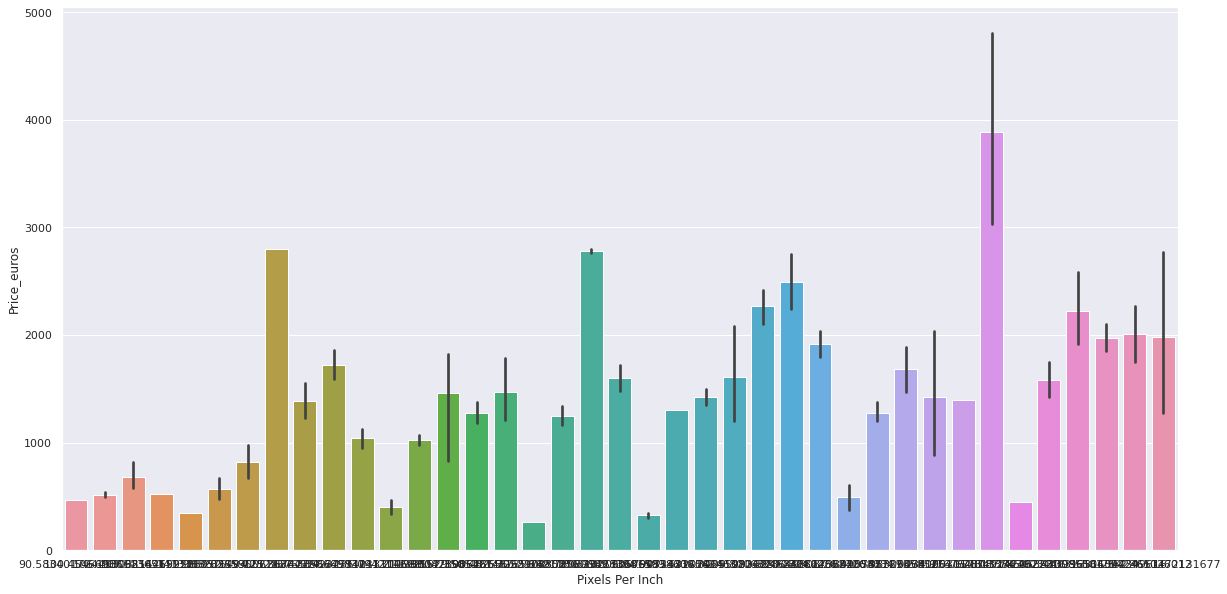

In [28]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.barplot(x=df["Pixels Per Inch"], y=df["Price_euros"], order=sorted(df["Pixels Per Inch"].unique()))


In [34]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

boolean_ordinal_features = ['Convertible', 'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD', 'free OpSys']
non_boolean_ordinal_features = ['ScreenResolution']
nominal_features = ['Company', 'Product', 'TypeName', 'OpSys', 'CPU brand', 'Cpu type', 'GPU_provider']

# Have not used 'Cpu', 'Gpu', 'Memory' as newly created features will be used (?)

column_transform = make_column_transformer(
    (OrdinalEncoder(), boolean_ordinal_features),
    (OrdinalEncoder(), non_boolean_ordinal_features),
    (OneHotEncoder(), nominal_features))


column_transform.fit_transform(df)

<1303x493 sparse matrix of type '<class 'numpy.float64'>'
	with 11014 stored elements in Compressed Sparse Row format>